<a href="https://colab.research.google.com/github/ozaneermis/Spotify-2023/blob/main/Spotfiy_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [298]:
df = pd.read_csv('//content/drive/MyDrive/Data/spotify-2023.csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [299]:
def check_df(df):
    print('---------Shape---------')
    print(df.shape)
    print('\n')
    print('---------Columns---------')
    print(df.columns)
    print('\n')
    print('---------Info---------')
    print(df.info())
    print('\n')
    print('---------Types---------')
    print(df.dtypes)
    print('\n')
    print('---------Tail---------')
    print(df.tail)
    print('\n')
    print('---------NA---------')
    print(df.isnull().sum())
check_df(df)

---------Shape---------
(953, 24)


---------Columns---------
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


---------Info---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   

In [300]:
#Veri setinin temel istatistiksel özelliklerinin incelenmesine yardımcı olur.
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Variable Description

* track_name: Şarkı ismi
* artist(s)_name: Sanatçı ya da sanatçıların isimleri
* artist_count: Şarkıda emeği geçen sanatçı sayısı
* released_year: Şarkının yayınlanma yılı
* released_month: Şarkının yayınlanma ayı
* released_day: Şarkının yayınlanma günü
* in_spotify_playlists: Şarkının Spotify'da dahil olduğu playlist sayısı
* in_spotify_charts: Şarkının Spotify'da sıralaması
* streams: Şarkının Spotify'da dinlenme sayısı
* in_apple_playlists: Şarkının Apple Music'te dahil olduğu playlist sayısı
* in_apple_charts: Şarkının Apple Music'te sıralaması
* in_deezer_playlists: Şarkının Deezer'da dahil olduğu playlist sayısı
* in_deezer_charts:  Şarkının Deezer'da dinlenme sayısı
* in_shazam_charts:  Şarkının Shazam'da aratılma sayısı sayısı
* bpm: (Beats per minute) Dakika başına vuruş sayısı, şarkının temposunu belirler
* key: Şarkının tonu(akor olarak)
* mode: Şarkının modu (major or minor)
* danceability_%: Şarkıyla birlikte dans edilebilme olasılığı
* valence_%: Şarkının müzikal içeriğinin olumluluğu
* energy_%: Şarkıdan alınan enerji oranı
* acousticness_%:  Şarkıdaki akustik ses miktarı
* instrumentalness_%: Şarkıdaki enstrümantal içerik miktarı
* liveness_%: Canlı gösterideki performans
* speechiness_%: Şarkıdaki sözlerin oranı

In [301]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [302]:
# df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64') hata veriyor.
# 'in_shazam_charts' sütunu int64 olması gerekiyor. Ancak bir tane satırdaki virgül bu durumu bozuyor.
# Trackname (Flowers) //// In_shazam_charts (1,021) //// Bu virgülü kaldırırsak problemimiz çözülüyor.
# 'in_shazam_charts' NaN değerleri içerdiği için direkt olarak 'int64' tipine çeviremiyoruz.

# Virgülleri kaldır
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')

# NaN değerleri düşür
df = df.dropna(subset=['in_shazam_charts'])

# Sütunu int64 tipine çevir
df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64')

# 'key' sütunundaki değerler model için önemli bir feauture olduğu için en çok tekrar eden ile doldurduk.
mode_value = df['key'].mode()[0]
df['key'] = df['key'].fillna(mode_value)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            903 non-null    object
 1   artist(s)_name        903 non-null    object
 2   artist_count          903 non-null    int64 
 3   released_year         903 non-null    int64 
 4   released_month        903 non-null    int64 
 5   released_day          903 non-null    int64 
 6   in_spotify_playlists  903 non-null    int64 
 7   in_spotify_charts     903 non-null    int64 
 8   streams               903 non-null    object
 9   in_apple_playlists    903 non-null    int64 
 10  in_apple_charts       903 non-null    int64 
 11  in_deezer_playlists   903 non-null    object
 12  in_deezer_charts      903 non-null    int64 
 13  in_shazam_charts      903 non-null    int64 
 14  bpm                   903 non-null    int64 
 15  key                   903 non-null    object


<ipython-input-302-c63265e065f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64')
<ipython-input-302-c63265e065f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'] = df['key'].fillna(mode_value)


In [303]:
# in_deezer_playlists sütunu da 'int64' olması gerekiyor.
# df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64') hata veriyor
# df[df['in_deezer_playlists']=='2,445']  Trackname (Starboy) ///// in_deezer_playlists (2,445)

# Virgülü kaldırdık.
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

# 'in_deezer_playlists' sütunun int64'e çevirdik.
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64')


In [304]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [305]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Looks Categoric But it is Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Looks Numeric But it is Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [306]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['key', 'mode', 'artist_count']

##################### Numeric #####################
['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

##################### Looks Categoric But it is Cardinal #####################
['track_name', 'artist(s)_name']

##################### Looks Numeric But it is Categoric #####################
['artist_count']

##################### Columns Overview #####################
Observations: 903
Variables: 24
cat_cols: 3
num_cols: 19
cat_but_car: 2
num_but_cat: 1


# Veri Temizleme ve Ön İşleme

# 1- Kategorik Değişkenlerin Görselleştirilmesi

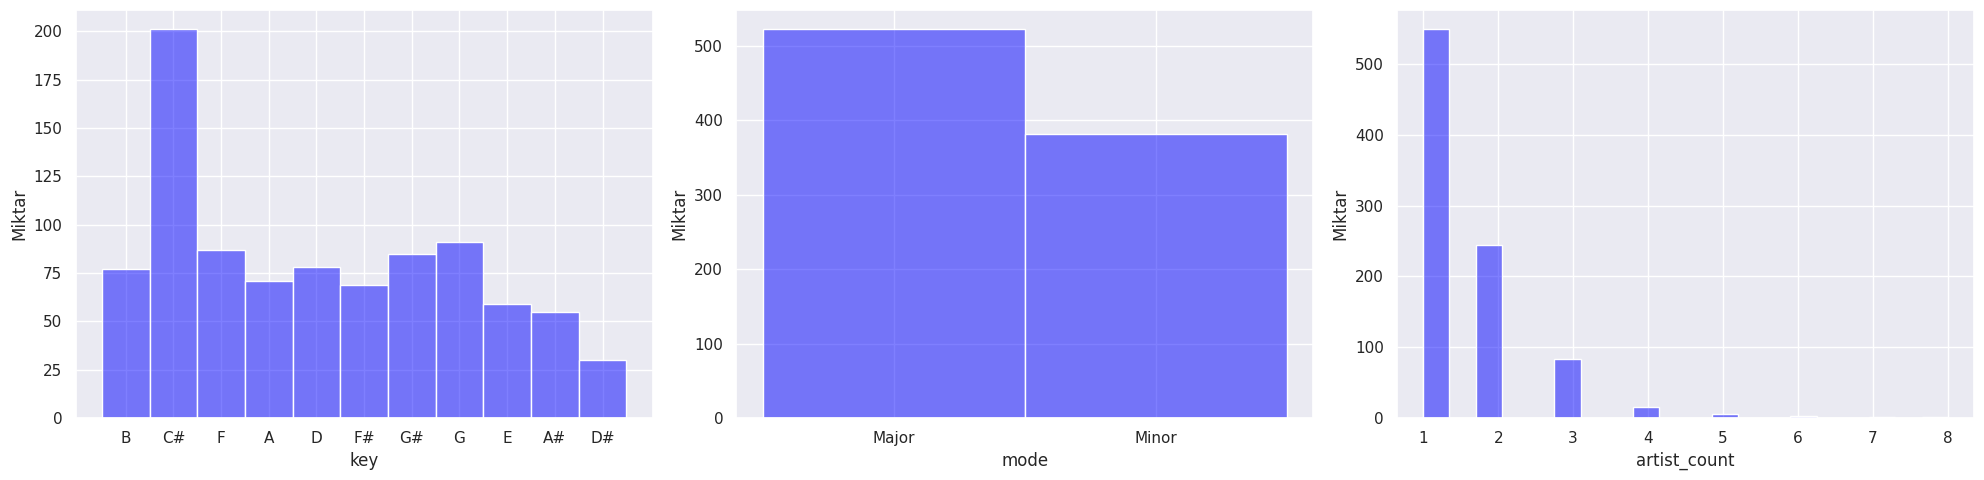

In [307]:
#Kategorik değişkenlerin grafiklerini inceliyoruz
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20, color="blue", alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Miktar", fontsize=12)

plt.tight_layout()
plt.show()

<h3> Grafiklerde de görüldüğü üzere şarkıların çoğunun ana notası (C#)'dır.

# 2- Sayısal Değişkenlerin Görselleştirilmesi

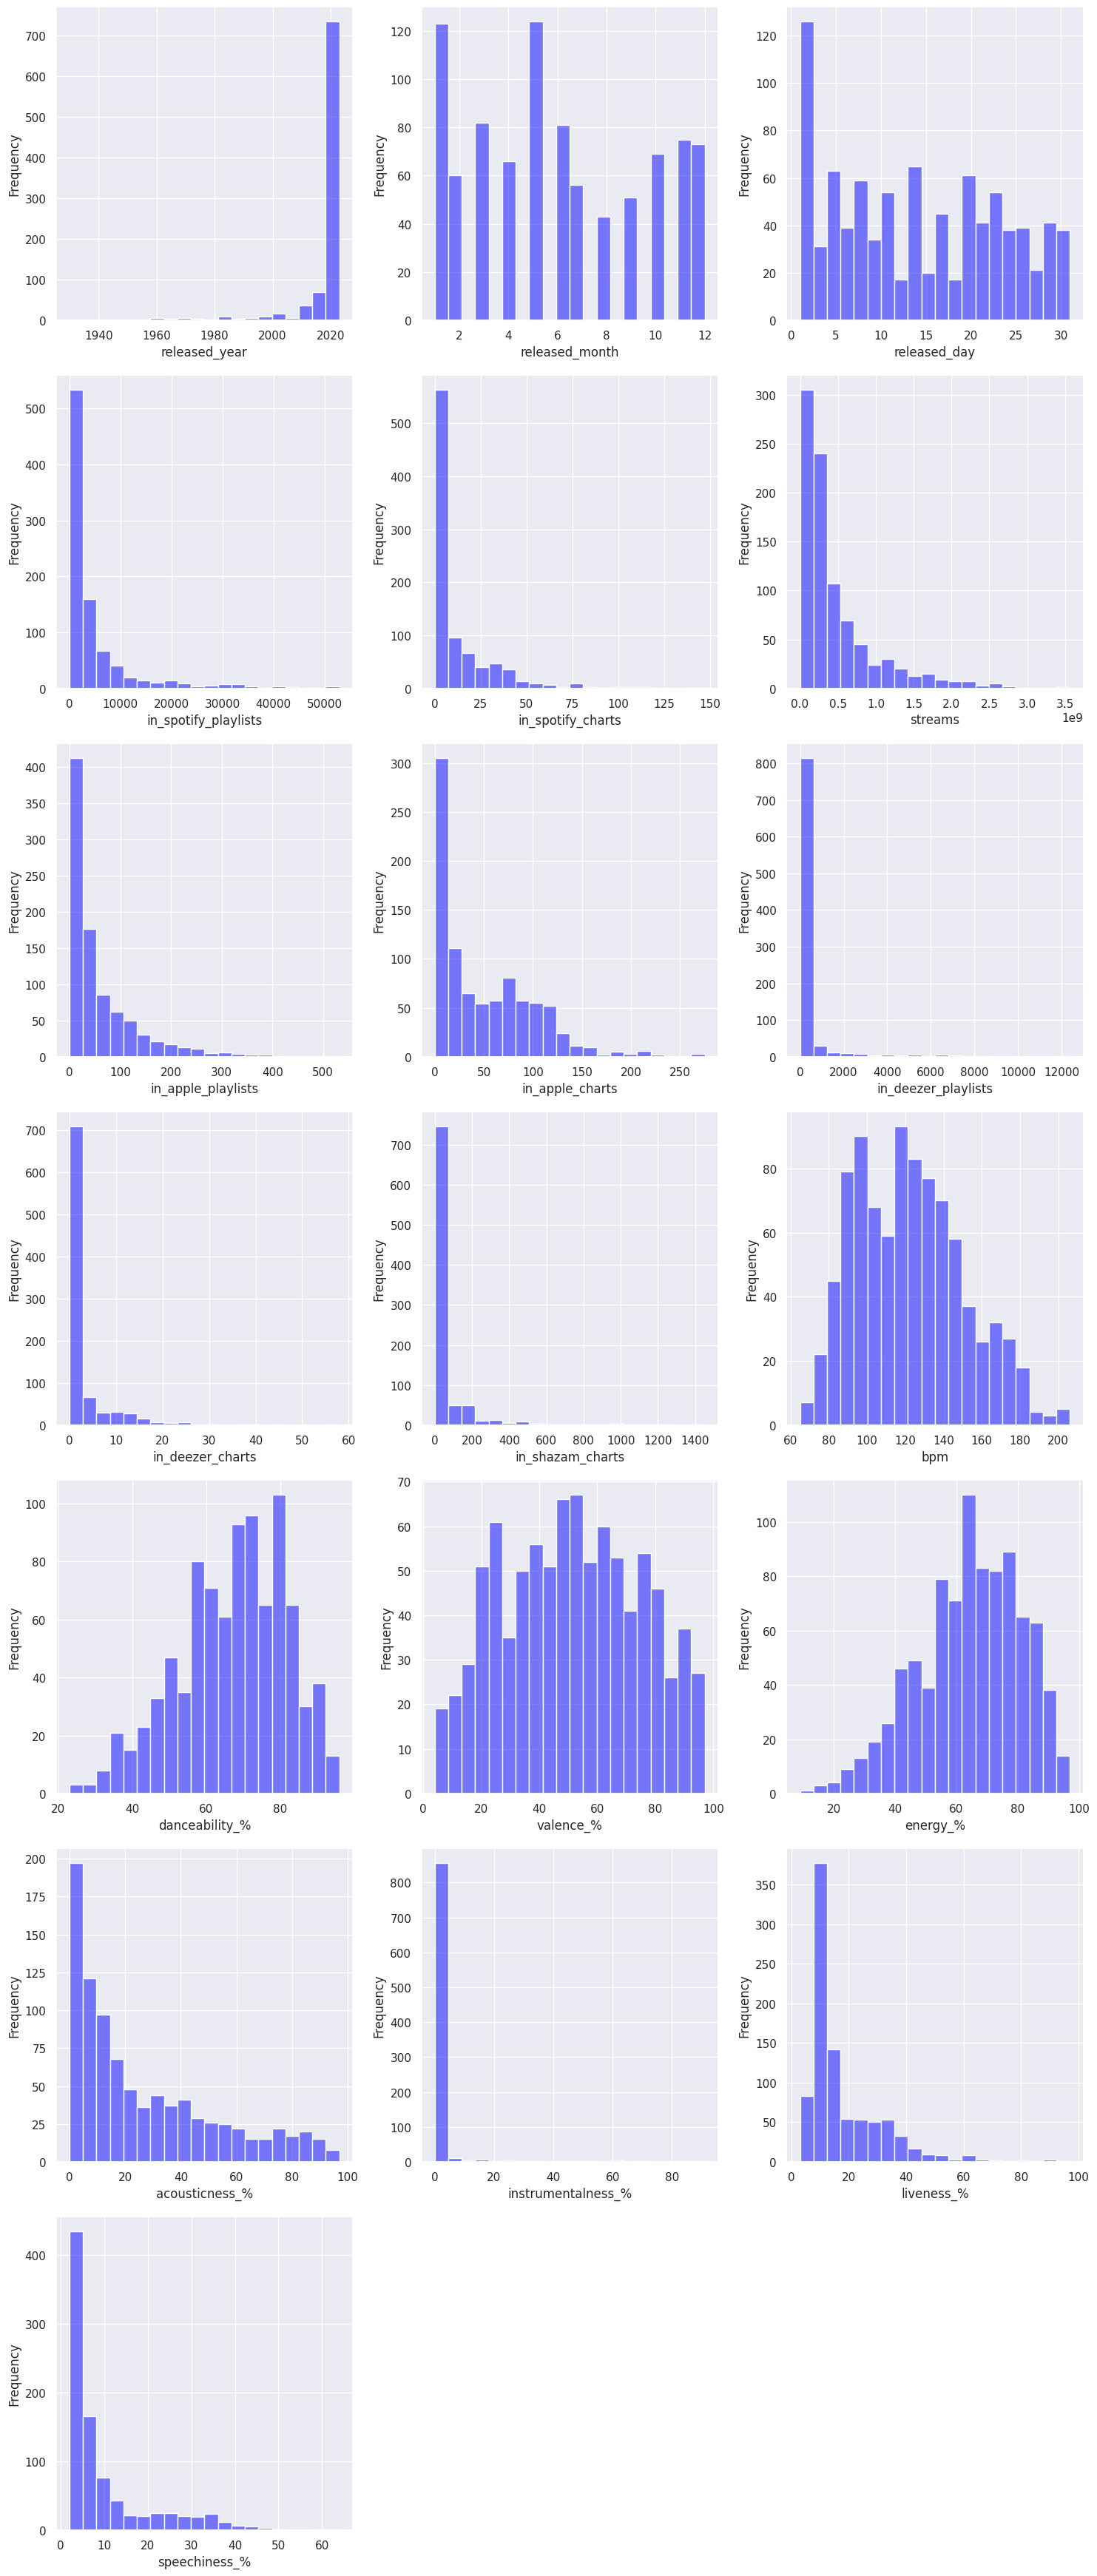

In [308]:

n_cols = 3
# Tüm sütunlar için yeterli satıra sahip olmamızı sağlar
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Her bir sayısal sütun için grafik ayarları
for i, column in enumerate(num_cols):
    sns.histplot(data=df, x=column, bins=20, color="blue", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Gereksiz grafikleri kaldırıyoruz
for j in range(i+1, len(axes)):
  axes[j].remove()

plt.tight_layout()
plt.show()


# Data Visualization

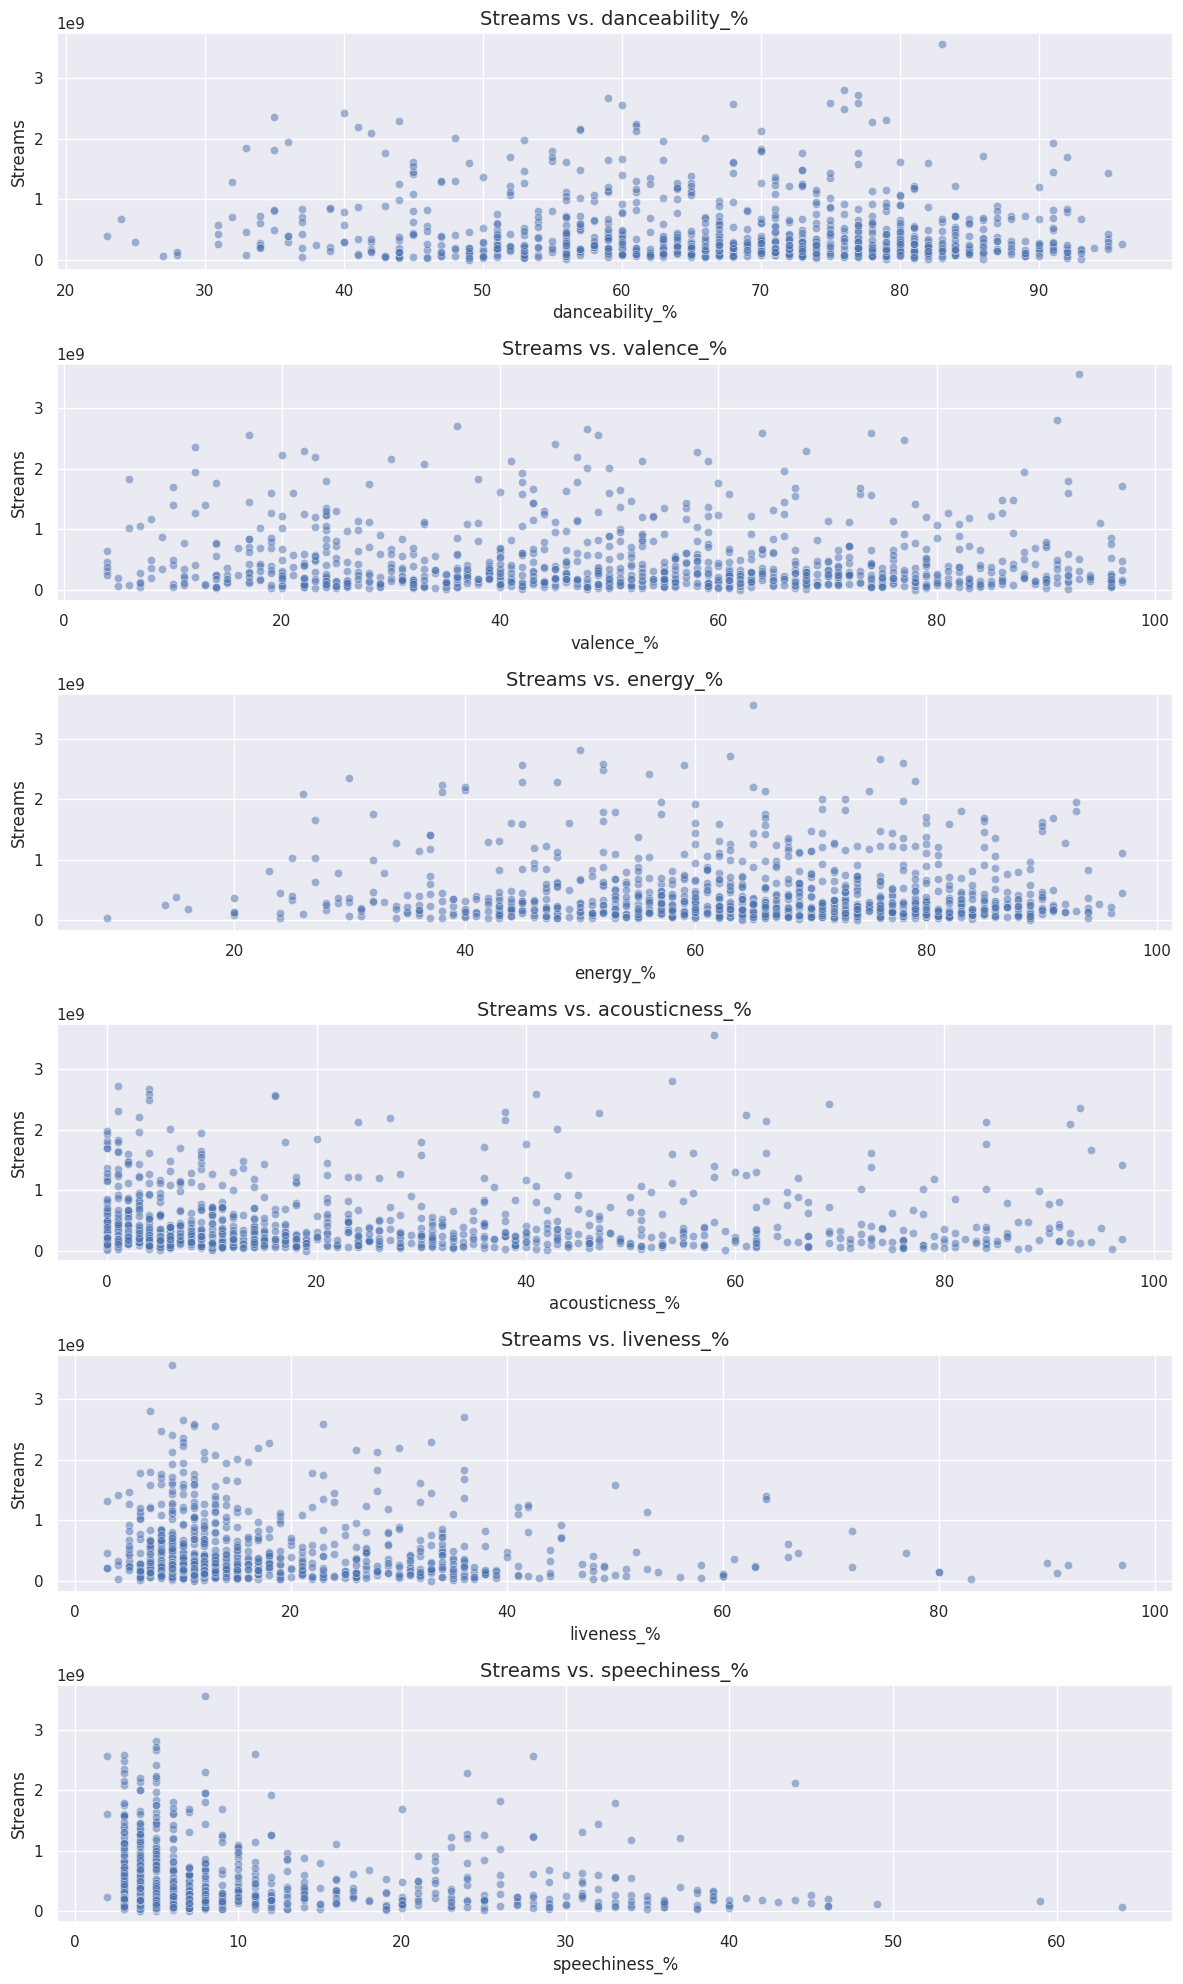

In [309]:
per_list = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']

# Grafiklerin şekli ve eksenlerini ayarlıyoruz.
fig, axes = plt.subplots(nrows=len(per_list), ncols=1, figsize=(12, 20))

# per_listteki her bir feature için ekseni ve grafiği ayarlıyoruz.
# Daha iyi bir görselleştirme için saydamlık değerliğini ayarlıyoruz.
for i, feature in enumerate(per_list):
    sns.scatterplot(x=df[feature], y=df['streams'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Streams vs. {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Streams')

plt.tight_layout()
plt.show()

<ipython-input-310-ca66df65a7b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streamed_songs['streams'], y=top_streamed_songs['track_artist'],


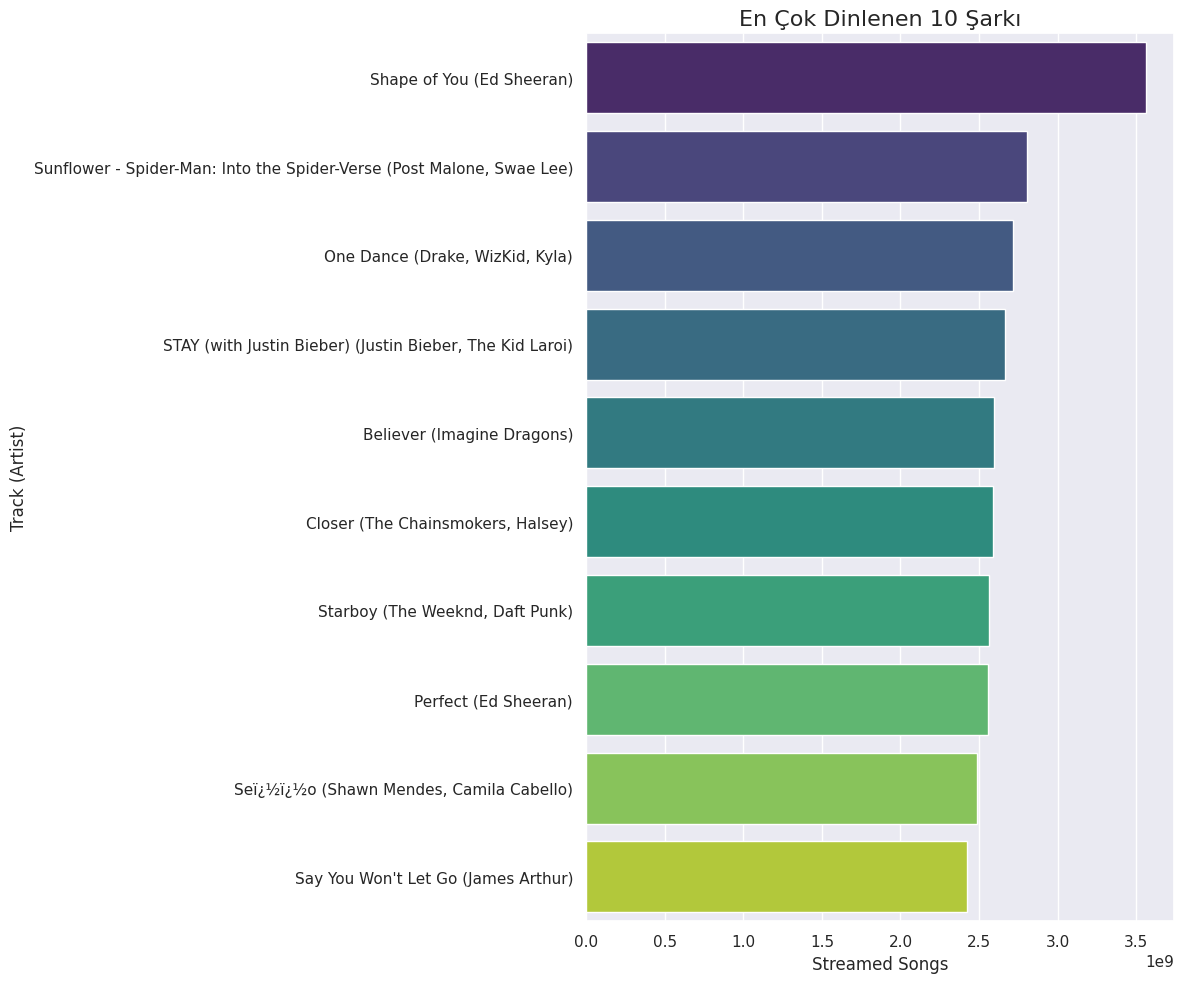

In [310]:
# Şimdi en çok dinlenen ilk 10 şarkıya bakalım
top_streamed_songs = df.sort_values(by='streams', ascending= False).head(10)

top_streamed_songs['track_artist'] = top_streamed_songs['track_name'] + " (" + top_streamed_songs['artist(s)_name'] + ")"

plt.figure(figsize=(12, 10))
sns.barplot(x=top_streamed_songs['streams'], y=top_streamed_songs['track_artist'],
            palette="viridis", orient='h')
plt.title('En Çok Dinlenen 10 Şarkı', fontsize=16)
plt.xlabel('Streamed Songs')
plt.ylabel('Track (Artist)')
plt.tight_layout()
plt.show()


# Korelasyon

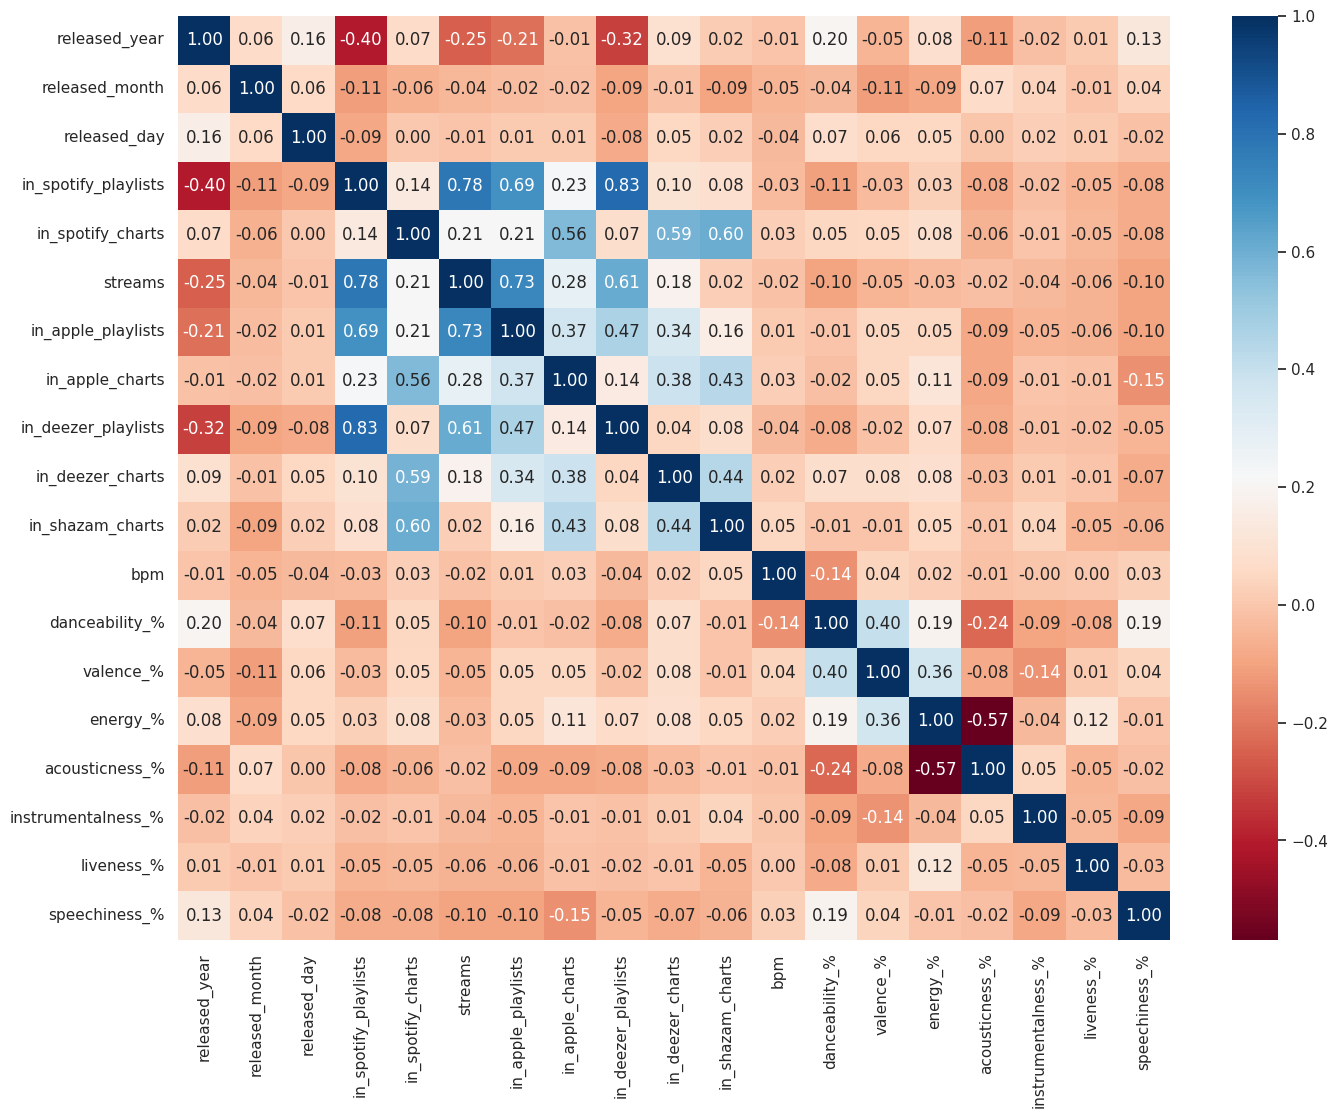

In [311]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (16, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True,fmt=".2f")  # annot=True ile korelasyon değerlerini göster
plt.show()

Correlation Matrix sayesinde öğrendiğimiz korelasyonlar :
*  # Pozitif korelasyon  
  * 'in_spotify_playlists' ve 'streams'
  * 'in_spotify_playlists' ve 'in_deezer_playlists'
*  # Negatif korelasyon
  * 'acousticness_%' ve 'energy_%'  



# Feature Engineering

1. <b>Var olan özelliklerden yeni bir özellik türetmek
2. <b>Outlier ve Noise temizleme
3. <b>Boyut azaltma
4. <b> Tekrarlanan özelliklerin kaldırılması

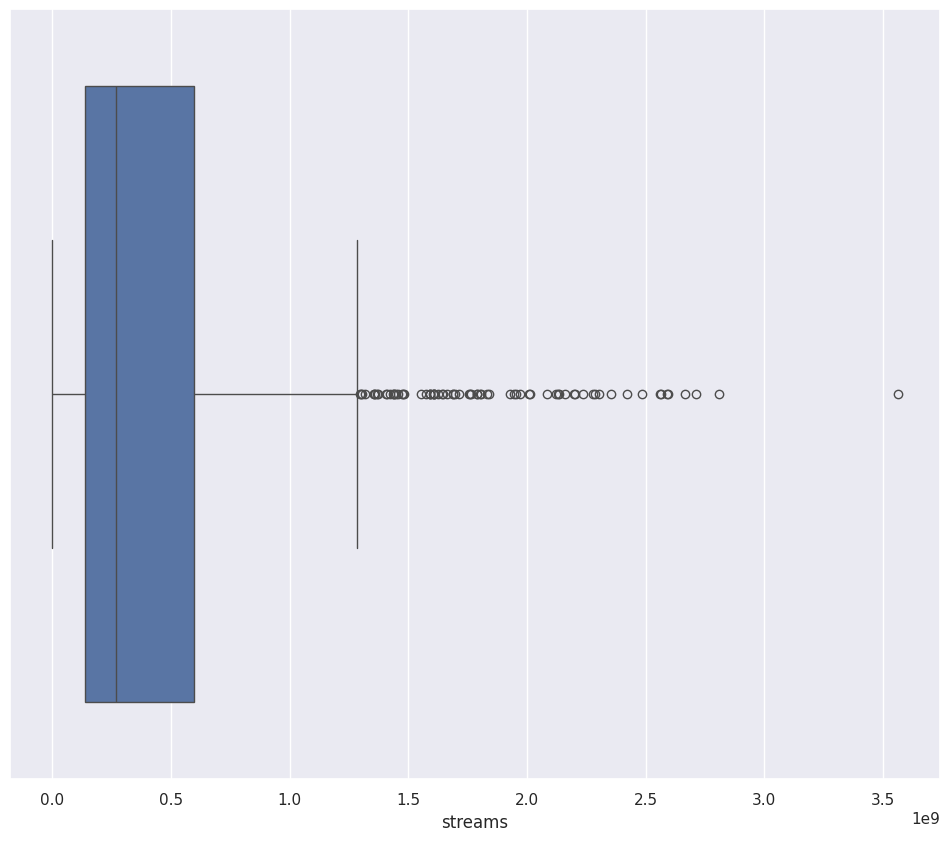

In [312]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['streams'])
plt.show(block=True)


In [313]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [314]:
print(outlier_thresholds(df,'streams'))

(-556382920.5, 1292014835.5)


In [315]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [316]:
print(check_outlier(df,'streams'))


True


Baskılama (Winsorizing : Baskılama, aykırı değerlerin belirli bir yüzdelik dilimi içine alınmasıyla gerçekleştirilir. Yani, en yüksek ve en düşük aykırı değerler yerine, belirli bir yüzdelik dilime ait değerler alınır. Bu, aykırı değerlerin etkisini azaltırken, orijinal veri setinin dağılımını korumaya yardımcı olabilir.

In [317]:
from scipy.stats.mstats import winsorize

# Winsorize uygulayacağımız sütunlar için fonksiyonu ayarlıyoruz.
def winsorize_columns(dataframe, column_names, limits=(0.05, 0.05)):
    for col_name in column_names:
        winsorized_col_name = f"{col_name}_winsorized"
        dataframe[winsorized_col_name] = winsorize(dataframe[col_name], limits=limits)

columns_to_winsorize = [
    'streams', 'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
    'in_deezer_charts', 'in_shazam_charts'
]

winsorize_columns(df, columns_to_winsorize)

# Winsorize uyguladıktan sonra describe fonksiyonu ile sütunları inceliyoruz.
for col in columns_to_winsorize:
    print(df[f"{col}_winsorized"].describe())


count    9.030000e+02
mean     4.473193e+08
std      4.416467e+08
min      5.229427e+07
25%      1.368429e+08
50%      2.716663e+08
75%      6.003735e+08
max      1.624166e+09
Name: streams_winsorized, dtype: float64
count      903.000000
mean      4261.801772
std       5509.474817
min        266.000000
25%        846.000000
50%       2012.000000
75%       4891.500000
max      21106.000000
Name: in_spotify_playlists_winsorized, dtype: float64
count    903.000000
mean      10.610188
std       14.769582
min        0.000000
25%        0.000000
50%        3.000000
75%       16.000000
max       48.000000
Name: in_spotify_charts_winsorized, dtype: float64
count    903.000000
mean      56.605759
std       61.245369
min        2.000000
25%       12.000000
50%       32.000000
75%       80.000000
max      222.000000
Name: in_apple_playlists_winsorized, dtype: float64
count    903.000000
mean      48.028793
std       44.270075
min        0.000000
25%        6.000000
50%       35.000000
75%       

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [318]:

# Winsorized uyguladığımız sütunları tek bir liste altında toplamak için belirtiyoruz.
winsorized_cols = [
    'in_spotify_playlists_winsorized','in_spotify_charts_winsorized',
    'streams_winsorized', 'in_apple_playlists_winsorized',
    'in_apple_charts_winsorized', 'in_deezer_playlists_winsorized',
    'in_deezer_charts_winsorized', 'in_shazam_charts_winsorized'
]

# num_cols ile winsorized sütunları birleştiriyoruz.
# Bu birleştirme korelasyon matrisi için.
all_cols = num_cols + winsorized_cols

In [319]:
all_cols

['released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'in_spotify_playlists_winsorized',
 'in_spotify_charts_winsorized',
 'streams_winsorized',
 'in_apple_playlists_winsorized',
 'in_apple_charts_winsorized',
 'in_deezer_playlists_winsorized',
 'in_deezer_charts_winsorized',
 'in_shazam_charts_winsorized']

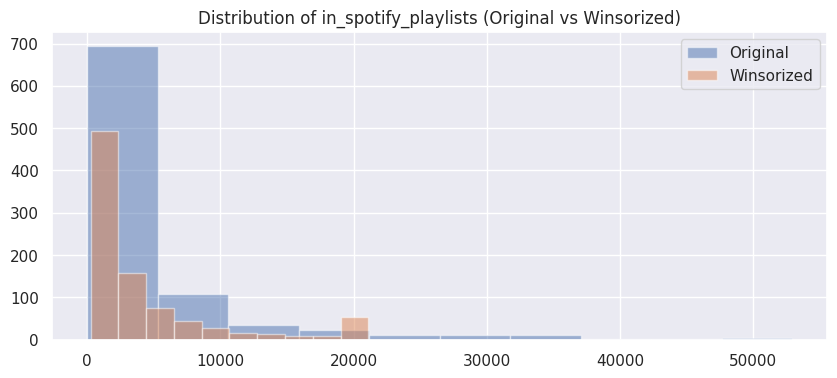

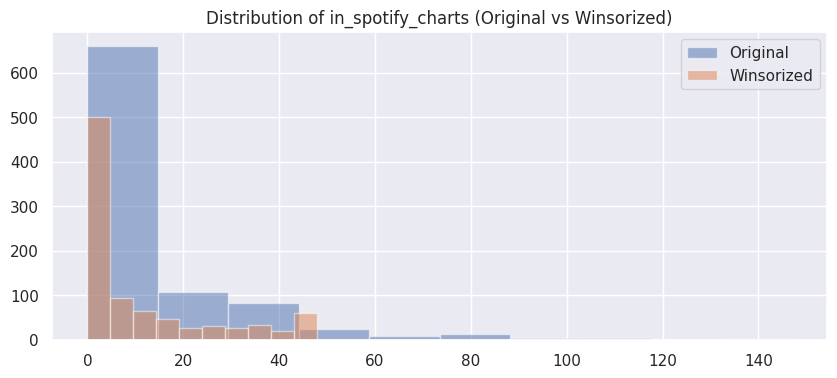

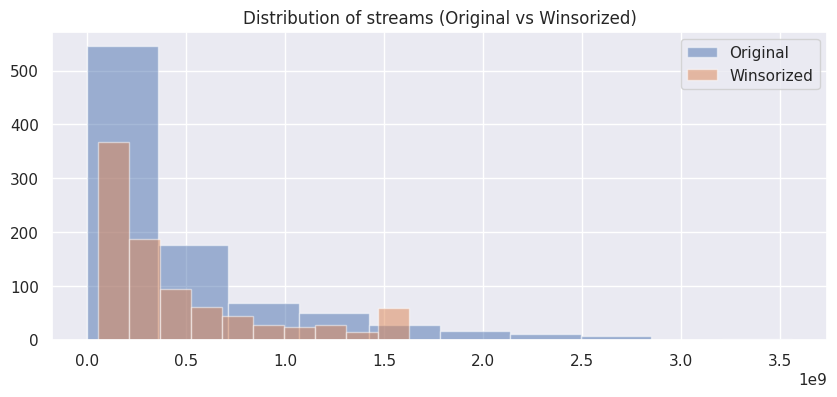

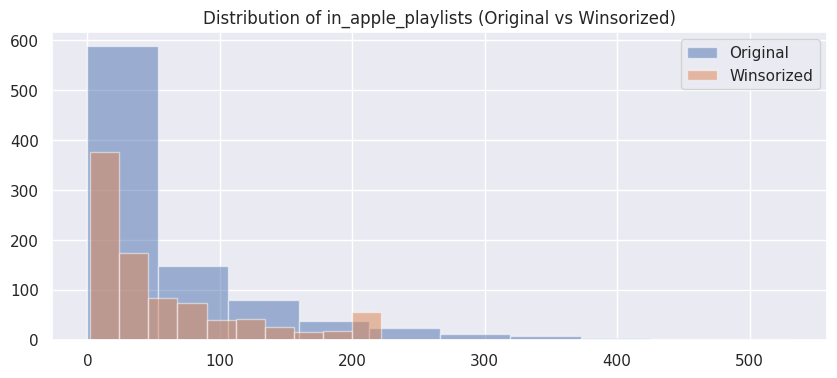

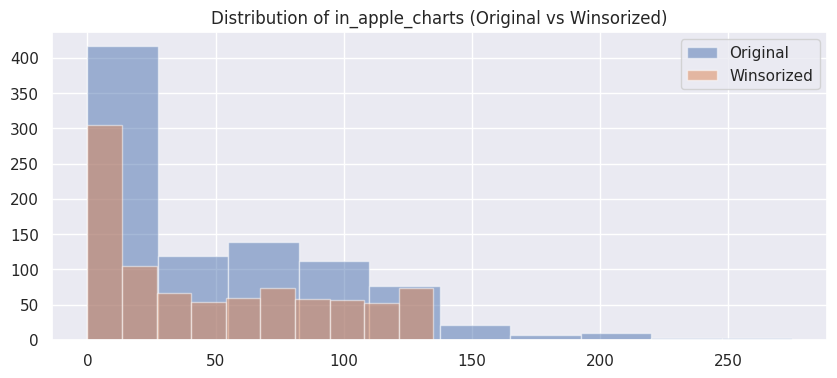

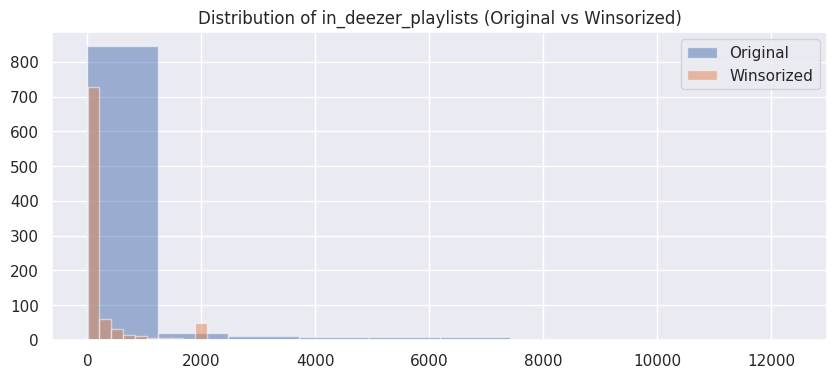

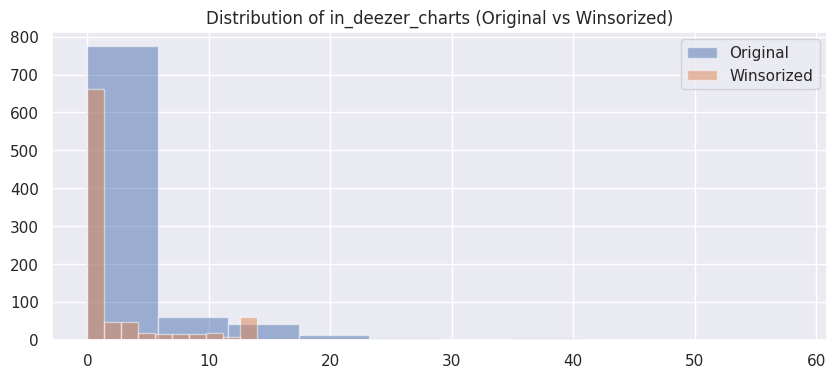

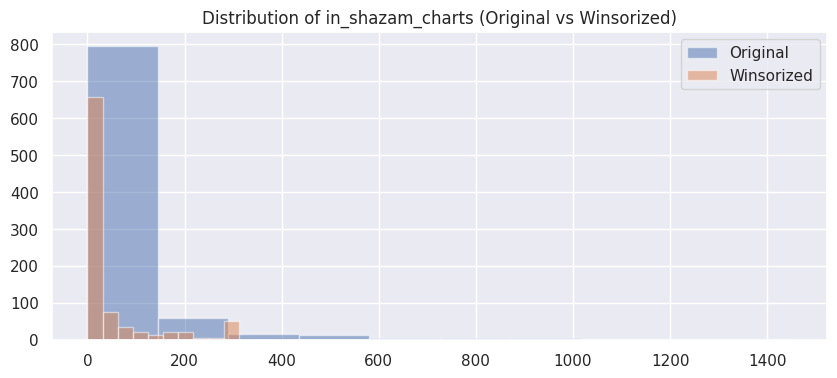

In [320]:
for wins_col in winsorized_cols:
    # _winsorized adını kaldırarak daya iyi ve anlaşılır bir title ekliyoruz.
    orig_col = wins_col.replace('_winsorized', '')

    # Winsorized uygulamadan önce ve sonrasını karşılaştırabilmek için plot grafiği
    plt.figure(figsize=(10, 4))
    plt.hist(df[orig_col], alpha=0.5, label='Original')
    plt.hist(df[wins_col], alpha=0.5, label='Winsorized')
    plt.title(f"Distribution of {orig_col} (Original vs Winsorized)")
    plt.legend(loc='upper right')
    plt.show()


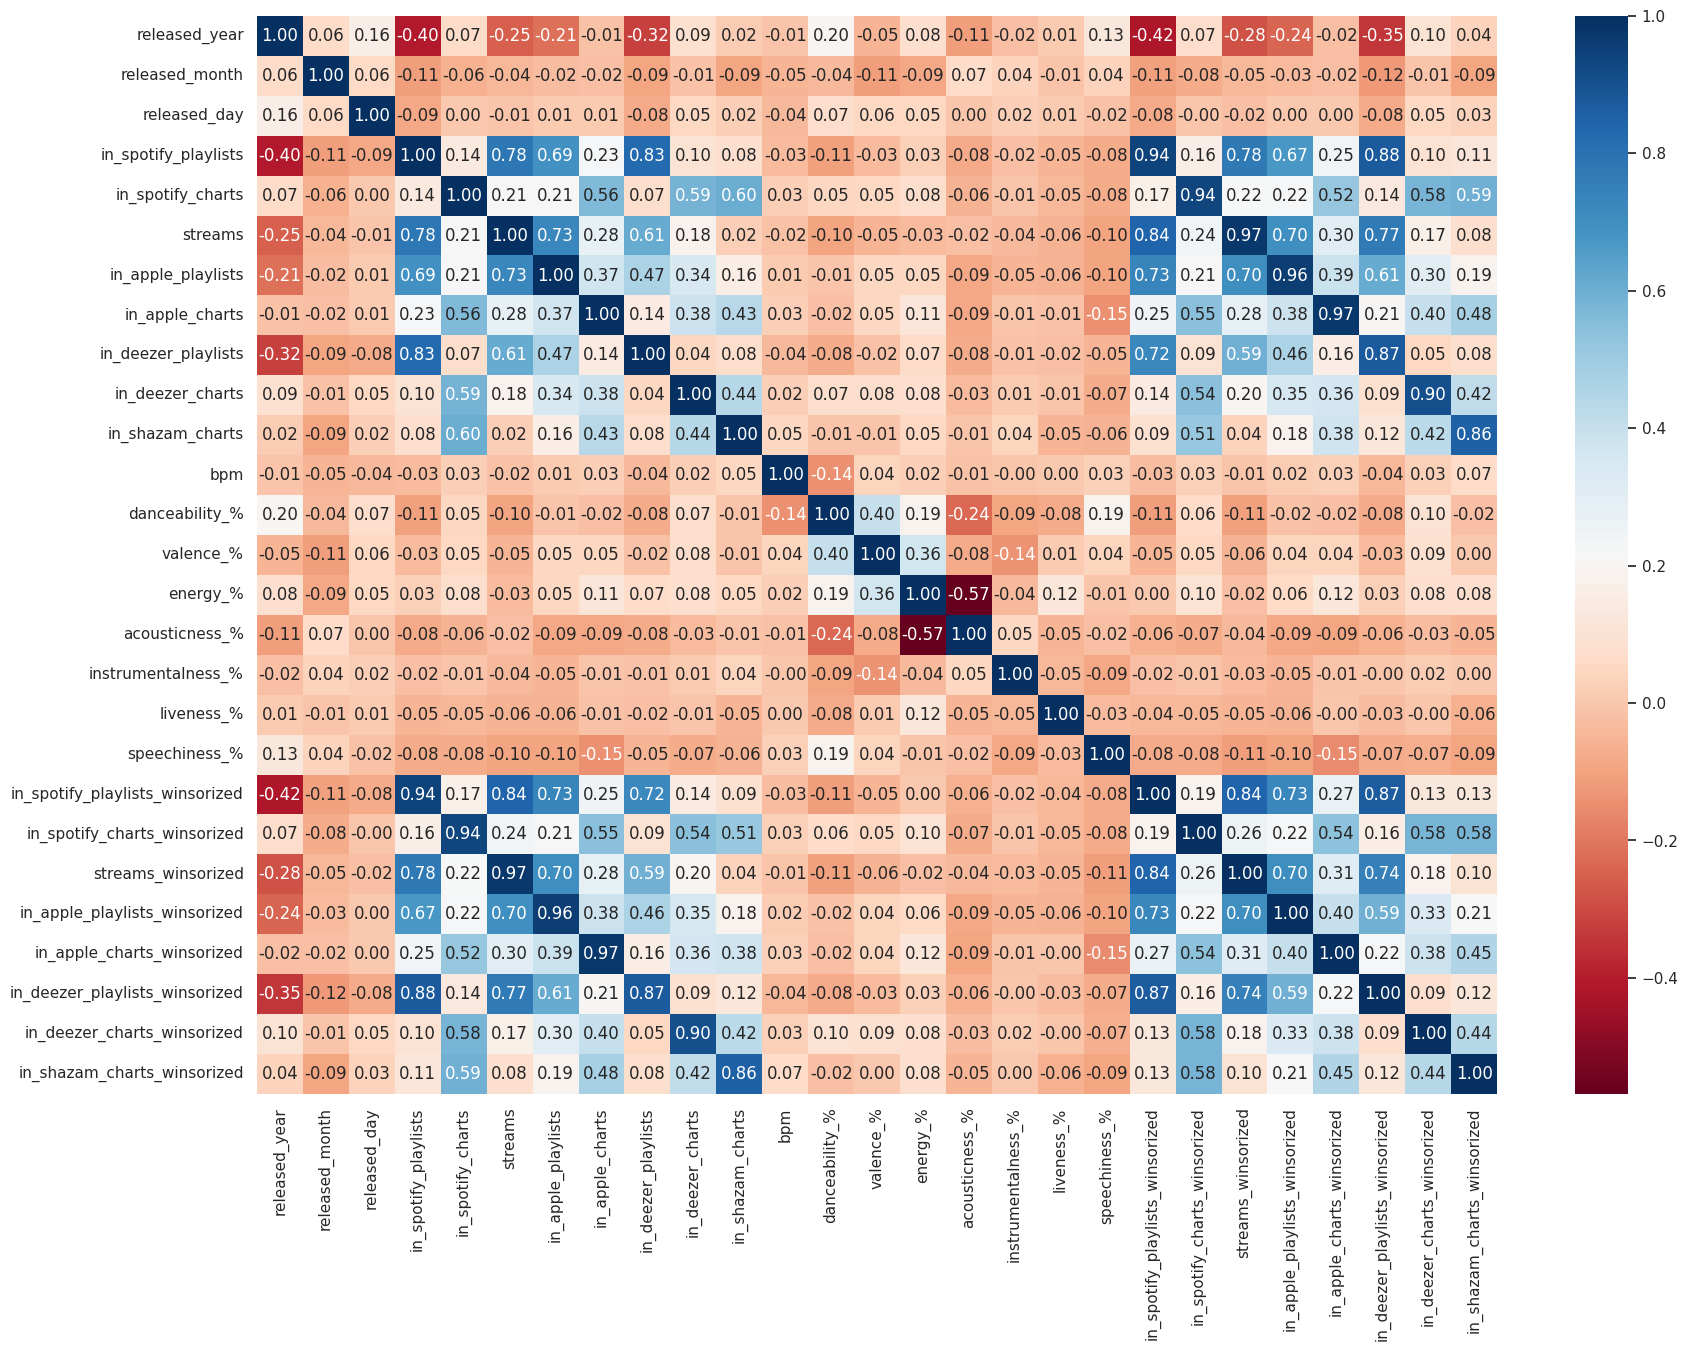

In [321]:

# Yeni korelasyon matrisi sayesinde korelasyon oranlarını tekrar karşılaştırıyoruz.
corr = df[all_cols].corr()
sns.set(rc={'figure.figsize': (20, 14)})
sns.heatmap(corr, cmap="RdBu", annot=True,fmt=".2f")
plt.show()


# Bazı korelasyonlarda düşüş yaşansa bile artış yaşanan korelasyon ikilileri şunlardır :

<h2> 'in_spotify_playlist' ----- 'streams' (78 ==> 84)
<h2> 'in_spotify_playlist' ----- 'in_deezer_playlist' (83 ==> 88)
<h2> 'in_spotfiy_playlist' ----- 'in_apply_playlist' (69 ==> 73)
<h2> 'streams' ----------------- 'in_deezer_playlist' (61 ==> 74)




In [327]:
# Dataframe'in üzerinden daha çok çalışabilmek için ikiye ayırıyoruz.
df_reduced = df[['track_name', 'streams', 'bpm', 'key','mode' ,'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
df_reduced.head()

,track_name,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),141381703.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [328]:
# Key ve Mode sütunları için one-hot encoding yapıyoruz.
# Bu modeli eğitirken ve veriyi incelerken bize daha fazla kolaylık sağlayacak.
df_encoded = pd.get_dummies(df_reduced, columns=['key', 'mode'],prefix=['key', 'mode'])
df_encoded.head()

,track_name,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),141381703.0,125,80,89,83,31,0,8,4,False,False,True,False,False,False,False,False,False,False,False,True,False
1,LALA,133716286.0,92,71,61,74,7,0,10,4,False,False,False,True,False,False,False,False,False,False,False,True,False
2,vampire,140003974.0,138,51,32,53,17,0,31,6,False,False,False,False,False,False,False,True,False,False,False,True,False
3,Cruel Summer,800840817.0,170,55,58,72,11,0,11,15,True,False,False,False,False,False,False,False,False,False,False,True,False
4,WHERE SHE GOES,303236322.0,144,65,23,80,14,63,11,6,True,False,False,False,False,False,False,False,False,False,False,False,True


In [332]:
df_encoded.info()
print('-------------Describe of the Data Frame----------\n',df_encoded.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 952
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          903 non-null    object 
 1   streams             902 non-null    float64
 2   bpm                 903 non-null    int64  
 3   danceability_%      903 non-null    int64  
 4   valence_%           903 non-null    int64  
 5   energy_%            903 non-null    int64  
 6   acousticness_%      903 non-null    int64  
 7   instrumentalness_%  903 non-null    int64  
 8   liveness_%          903 non-null    int64  
 9   speechiness_%       903 non-null    int64  
 10  key_A               903 non-null    bool   
 11  key_A#              903 non-null    bool   
 12  key_B               903 non-null    bool   
 13  key_C#              903 non-null    bool   
 14  key_D               903 non-null    bool   
 15  key_D#              903 non-null    bool   
 16  key_E        

In [337]:
# Sütunları belirtiyoruz.
cols_to_int= ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

# True ve False verileri 1 ve 0 lara çeviriyoruz.
for column in cols_to_int:
    df_encoded[column] = df_encoded[column].astype(int)

df_encoded.head()

,track_name,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),141381703.0,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,LALA,133716286.0,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,vampire,140003974.0,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,Cruel Summer,800840817.0,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,WHERE SHE GOES,303236322.0,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


<ipython-input-347-c123c0e31652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key', y='bpm', data=df_encoded, palette='coolwarm')


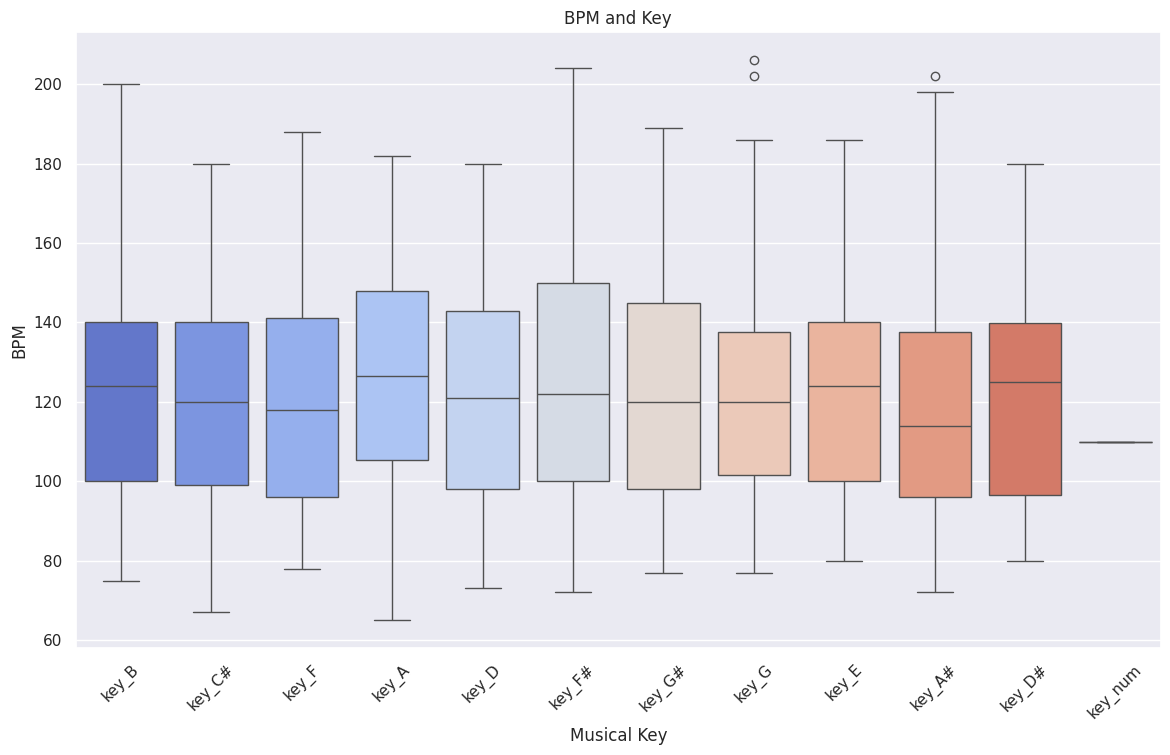

In [347]:
# BPM sütunu ile her bir key için box plot karşılaştırması yapıyoruz.
plt.figure(figsize=(14, 8))
sns.boxplot(x='key', y='bpm', data=df_encoded, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Musical Key')
plt.ylabel('BPM')
plt.title('BPM and Key')
plt.show()


# Bu grafiktede görüldüğü üzere şarkılan çoğu 140-100 BPM arasında